In [22]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import root_pandas
import pandas as pd
import uproot
import numpy as np
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerBase
import os

In [24]:
def plot_xyprojection(xdata, ydata, hitcolor, hitlabel, hitsize=0.001, savebool=True, savename='projectionplot.pdf', xlimlow=0.0, xlimup=0.0, ylimlow=0.0, ylimup=0.0, legendloc=2):
    fig, ax = plt.subplots()
    x = xdata
    y = ydata
    
    circle1 = plt.Circle((0, 0), 44.85, color='black', fill=False, ls='--', lw=0.75, label='TPC cage')
    circle2 = plt.Circle((0, 0), 109.4, color='black', fill=False, ls='--', lw=0.75)
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$x$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$y$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if xlimlow and xlimup:
        ax.set_xlim(xlimlow, xlimup)
    if ylimlow and ylimup:
        ax.set_ylim(ylimlow, ylimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccircle = ax.add_artist(circle1)
    ax.add_artist(circle2)
    
    fig.set_size_inches(10, 10)
    plt.title('Readout plane projection', fontsize=25)
    lgnd = plt.legend(handles=[tpchits, tpccircle],loc=legendloc, prop={'size':15})
    lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

In [25]:
def plot_sideprojection(zdata, sidedata, sidename,hitcolor, hitlabel, hitsize=0.001, savebool=True, savename='projectionplot.pdf', zlimlow=0.0, zlimup=0.0, sidelimlow=0.0, sidelimup=0.0):
    fig, ax = plt.subplots()
    x = zdata
    y = sidedata
    
    rect1 = plt.Rectangle((-241.69,-109.4), 725.07, 218.8 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
    plt.vlines(x=0, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    plt.vlines(x=241.69, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    
    tpchits = ax.scatter(x, y, marker='.', s = hitsize, color=hitcolor , label=hitlabel)
    ax.set_xlabel('$z$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_ylabel('$'+sidename+'$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    if zlimlow and zlimup:
        ax.set_xlim(zlimlow, zlimup)
    if sidelimlow and sidelimup:
        ax.set_ylim(sidelimlow, sidelimup)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(rect1)
    
    fig.set_size_inches(15, 15)
    plt.title('Side View of TPC Volume', fontsize=25)
    # lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    # lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    if savebool==True:
        plt.savefig(savename) 
    plt.show()
    plt.close()

# Reading TPCeventoverlay.root

In [26]:
filename = "/gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/TESTTPCEventOverlay2283003435.root"#611905953.root"
filename_save = filename[80:-5]
print(filename_save)
TPC = root_pandas.read_root(filename, 'tree')
TPC

2283003435


,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
0,-1.531283,44.890178,101.173864,13139.462842,-1.53,44.89,101.15875,13137.5,1,94,10,-211,True
1,-1.522498,44.912207,101.119068,13132.346487,-1.53,44.91,101.15875,13137.5,1,94,10,-211,True
2,-1.553065,44.958035,101.402884,13169.205753,-1.55,44.95,101.35125,13162.5,1,94,10,-211,True
3,-1.476252,44.981465,100.854908,13098.040042,-1.47,44.99,100.77375,13087.5,1,94,10,-211,True
4,-1.641313,45.012802,100.720900,13080.636395,-1.65,45.01,100.77375,13087.5,1,94,10,-211,True
5,-1.577461,44.936152,101.224139,13145.992079,-1.57,44.93,101.15875,13137.5,1,94,10,-211,True
6,-1.465486,44.911676,100.945801,13109.844249,-1.47,44.91,100.96625,13112.5,1,94,10,-211,True
7,-1.497878,44.983873,100.801344,13091.083625,-1.49,44.99,100.77375,13087.5,1,94,10,-211,True
8,-1.590812,45.034911,100.929552,13107.734068,-1.59,45.03,100.96625,13112.5,1,94,10,-211,True
9,-1.445874,44.909843,101.321687,13158.660696,-1.45,44.91,101.35125,13162.5,1,94,10,-211,True


In [27]:
TPCRegistered = TPC[TPC["registered"]==True]
TPCRegistered

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
0,-1.531283,44.890178,101.173864,13139.462842,-1.53,44.89,101.15875,13137.5,1,94,10,-211,True
1,-1.522498,44.912207,101.119068,13132.346487,-1.53,44.91,101.15875,13137.5,1,94,10,-211,True
2,-1.553065,44.958035,101.402884,13169.205753,-1.55,44.95,101.35125,13162.5,1,94,10,-211,True
3,-1.476252,44.981465,100.854908,13098.040042,-1.47,44.99,100.77375,13087.5,1,94,10,-211,True
4,-1.641313,45.012802,100.720900,13080.636395,-1.65,45.01,100.77375,13087.5,1,94,10,-211,True
5,-1.577461,44.936152,101.224139,13145.992079,-1.57,44.93,101.15875,13137.5,1,94,10,-211,True
6,-1.465486,44.911676,100.945801,13109.844249,-1.47,44.91,100.96625,13112.5,1,94,10,-211,True
7,-1.497878,44.983873,100.801344,13091.083625,-1.49,44.99,100.77375,13087.5,1,94,10,-211,True
8,-1.590812,45.034911,100.929552,13107.734068,-1.59,45.03,100.96625,13112.5,1,94,10,-211,True
9,-1.445874,44.909843,101.321687,13158.660696,-1.45,44.91,101.35125,13162.5,1,94,10,-211,True


In [28]:
TPCDead = TPC[TPC["registered"]==False]
TPCDead

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
1874,-9.711754,70.065327,111.722951,14509.474193,-9.71,70.07,111.74625,14512.5,1,94,10,-211,False
1875,-9.766510,70.008874,112.096306,14557.961823,-9.77,70.01,112.13125,14562.5,1,94,10,-211,False
1876,-9.701575,70.005151,111.571943,14489.862675,-9.71,70.01,111.55375,14487.5,1,94,10,-211,False
1882,-9.791823,70.021162,111.678048,14503.642638,-9.79,70.03,111.74625,14512.5,1,94,10,-211,False
1886,-9.814849,70.159028,111.795135,14518.848646,-9.81,70.15,111.74625,14512.5,1,94,10,-211,False
1887,-9.759733,70.094166,111.710892,14507.908090,-9.75,70.09,111.74625,14512.5,1,94,10,-211,False
1889,-9.847574,70.121532,111.566256,14489.124146,-9.85,70.13,111.55375,14487.5,1,94,10,-211,False
1890,-9.684143,70.138345,111.717988,14508.829555,-9.69,70.13,111.74625,14512.5,1,94,10,-211,False
1891,-9.667318,70.000486,111.705806,14507.247593,-9.67,70.01,111.74625,14512.5,1,94,10,-211,False
1892,-9.769504,70.143307,111.921310,14535.235100,-9.77,70.15,111.93875,14537.5,1,94,10,-211,False


## Defining Colormaps

In [5]:
cdict1 = {'red':  (#(0.0, 0.729, 0.729),
                   #(0.04, 0.682, 0.682),
                   #(0.12, 0.627, 0.627),
                   (0.00, 0.584, 0.584),
                   (0.10, 0.545, 0.545),
                   (0.20, 0.502, 0.502),
                   (0.30, 0.475, 0.475),
                   (0.40, 0.435, 0.435),
                   (0.50, 0.400, 0.400),
                   (0.60, 0.373, 0.373),
                   (0.70, 0.306, 0.306),
                   (0.80, 0.224, 0.224),
                   (0.90, 0.192, 0.192),
                   (1.00, 0.165, 0.165)),

         'green': (#(0.00, 0.867, 0.867),
                   #(0.04, 0.835, 0.835),
                   #(0.12, 0.800, 0.800),
                   (0.00, 0.765, 0.765),
                   (0.10, 0.729, 0.729),
                   (0.20, 0.694, 0.694),
                   (0.30, 0.659, 0.659),
                   (0.40, 0.627, 0.627),
                   (0.50, 0.596, 0.596),
                   (0.60, 0.549, 0.549),
                   (0.70, 0.498, 0.498),
                   (0.80, 0.404, 0.404),
                   (0.90, 0.373, 0.373),
                   (1.0 , 0.341, 0.341)),

         'blue':  (#(0.00, 0.949, 0.949),
                   #(0.04, 0.933, 0.933),
                   #(0.12, 0.914, 0.914),
                   (0.00, 0.894, 0.894),
                   (0.10, 0.871, 0.871),
                   (0.20, 0.843, 0.843),
                   (0.30, 0.808, 0.808),
                   (0.40, 0.788, 0.788),
                   (0.50, 0.765, 0.765),
                   (0.60, 0.729, 0.729),
                   (0.70, 0.686, 0.686),
                   (0.80, 0.588, 0.588),
                   (0.90, 0.553, 0.553),
                   (1.00, 0.522, 0.522))
        }
blue_tableau = LinearSegmentedColormap('TableauBlue', cdict1)


In [6]:
cdict2 = {'red':  (#(0.0, 0.729, 0.729),
                   #(0.04, 0.682, 0.682),
                   #(0.12, 0.627, 0.627),
                   (0.00, 0.906, 0.906),
                   (0.10, 0.867, 0.867),
                   (0.20, 0.831, 0.831),
                   (0.30, 0.792, 0.792),
                   (0.40, 0.753, 0.753),
                   (0.50, 0.714, 0.714),
                   (0.60, 0.663, 0.663),
                   (0.70, 0.608, 0.608),
                   (0.80, 0.561, 0.561),
                   (0.90, 0.522, 0.522),
                   (1.00, 0.486, 0.486)),

         'green': (#(0.00, 0.867, 0.867),
                   #(0.04, 0.835, 0.835),
                   #(0.12, 0.800, 0.800),
                   (0.00, 0.733, 0.733),
                   (0.10, 0.686, 0.686),
                   (0.20, 0.639, 0.639),
                   (0.30, 0.592, 0.592),
                   (0.40, 0.545, 0.545),
                   (0.50, 0.498, 0.498),
                   (0.60, 0.459, 0.459),
                   (0.70, 0.420, 0.420),
                   (0.80, 0.380, 0.380),
                   (0.90, 0.341, 0.341),
                   (1.0 , 0.302, 0.302)),

         'blue':  (#(0.00, 0.949, 0.949),
                   #(0.04, 0.933, 0.933),
                   #(0.12, 0.914, 0.914),
                   (0.00, 0.859, 0.859),
                   (0.10, 0.812, 0.812),
                   (0.20, 0.765, 0.765),
                   (0.30, 0.725, 0.725),
                   (0.40, 0.682, 0.682),
                   (0.50, 0.643, 0.643),
                   (0.60, 0.616, 0.616),
                   (0.70, 0.592, 0.592),
                   (0.80, 0.545, 0.545),
                   (0.90, 0.518, 0.518),
                   (1.00, 0.475, 0.475))
        }
purple_tableau = LinearSegmentedColormap('TableauPurple', cdict2)


In [7]:
cdict3 = {'red':  (#(0.0, 0.729, 0.729),
                   #(0.04, 0.682, 0.682),
                   #(0.12, 0.627, 0.627),
                   (0.00, 0.961, 0.961),
                   (0.10, 0.969, 0.969),
                   (0.20, 0.949, 0.949),
                   (0.30, 0.898, 0.898),
                   (0.40, 0.863, 0.863),
                   (0.50, 0.835, 0.835),
                   (0.60, 0.808, 0.808),
                   (0.70, 0.769, 0.769),
                   (0.80, 0.725, 0.725),
                   (0.90, 0.671, 0.671),
                   (1.00, 0.612, 0.612)),

         'green': (#(0.00, 0.867, 0.867),
                   #(0.04, 0.835, 0.835),
                   #(0.12, 0.800, 0.800),
                   (0.00, 0.647, 0.647),
                   (0.10, 0.541, 0.541),
                   (0.20, 0.439, 0.439),
                   (0.30, 0.353, 0.353),
                   (0.40, 0.271, 0.271),
                   (0.50, 0.184, 0.184),
                   (0.60, 0.114, 0.114),
                   (0.70, 0.106, 0.106),
                   (0.80, 0.098, 0.098),
                   (0.90, 0.086, 0.086),
                   (1.0 , 0.078, 0.078)),

         'blue':  (#(0.00, 0.949, 0.949),
                   #(0.04, 0.933, 0.933),
                   #(0.12, 0.914, 0.914),
                   (0.00, 0.612, 0.612),
                   (0.10, 0.490, 0.490),
                   (0.20, 0.380, 0.380),
                   (0.30, 0.282, 0.282),
                   (0.40, 0.208, 0.208),
                   (0.50, 0.145, 0.145),
                   (0.60, 0.102, 0.102),
                   (0.70, 0.090, 0.090),
                   (0.80, 0.102, 0.102),
                   (0.90, 0.122, 0.122),
                   (1.00, 0.137, 0.137))
        }
red_tableau = LinearSegmentedColormap('TableauRed', cdict3)


In [8]:
cdict4 = {'red':  ((0.00, 0.624, 0.624),
                   (0.20, 0.557, 0.557),
                   (0.40, 0.494, 0.494),
                   (0.60, 0.431, 0.431),
                   (0.80, 0.369, 0.369),
                   (0.99, 0.314, 0.314),
                   #(0.60, 0.259, 0.259),
                   #(0.70, 0.208, 0.208),
                   #(0.80, 0.161, 0.161),
                   #(0.90, 0.118, 0.118),
                   (1.00, 0.000, 0.000)),

         'green': ((0.00, 0.624, 0.624),
                   (0.20, 0.557, 0.557),
                   (0.40, 0.494, 0.494),
                   (0.60, 0.431, 0.431),
                   (0.80, 0.369, 0.369),
                   (0.99, 0.314, 0.314),
                   #(0.60, 0.259, 0.259),
                   #(0.70, 0.208, 0.208),
                   #(0.80, 0.161, 0.161),
                   #(0.90, 0.118, 0.118),
                   (1.0 , 0.000, 0.000)),

         'blue':  ((0.00, 0.624, 0.624),
                   (0.20, 0.557, 0.557),
                   (0.40, 0.494, 0.494),
                   (0.60, 0.431, 0.431),
                   (0.80, 0.369, 0.369),
                   (0.99, 0.314, 0.314),
                   #(0.60, 0.259, 0.259),
                   #(0.70, 0.208, 0.208),
                   #(0.80, 0.161, 0.161),
                   #(0.90, 0.118, 0.118),
                   (1.00, 0.000, 0.000))
        }
grey_tableau = LinearSegmentedColormap('TableauGrey', cdict4)

In [9]:
cdict5 = {'red':  (#(0.0, 0.729, 0.729),
                   #(0.04, 0.682, 0.682),
                   #(0.12, 0.627, 0.627),
                   (0.00, 0.973, 0.973),
                   (0.10, 0.992, 0.992),
                   (0.20, 0.996, 0.996),
                   (0.30, 0.984, 0.984),
                   (0.40, 0.957, 0.957),
                   (0.50, 0.914, 0.914),
                   (0.60, 0.863, 0.863),
                   (0.70, 0.769, 0.769),
                   (0.80, 0.659, 0.659),
                   (0.90, 0.569, 0.569),
                   (1.00, 0.482, 0.482)),

         'green': (#(0.00, 0.867, 0.867),
                   #(0.04, 0.835, 0.835),
                   #(0.12, 0.800, 0.800),
                   (0.00, 0.714, 0.714),
                   (0.10, 0.659, 0.659),
                   (0.20, 0.588, 0.588),
                   (0.30, 0.514, 0.514),
                   (0.40, 0.435, 0.435),
                   (0.50, 0.361, 0.361),
                   (0.60, 0.290, 0.290),
                   (0.70, 0.239, 0.239),
                   (0.80, 0.204, 0.204),
                   (0.90, 0.192, 0.192),
                   (1.0 , 0.188, 0.188)),

         'blue':  (#(0.00, 0.949, 0.949),
                   #(0.04, 0.933, 0.933),
                   #(0.12, 0.914, 0.914),
                   (0.00, 0.486, 0.486),
                   (0.10, 0.388, 0.388),
                   (0.20, 0.290, 0.290),
                   (0.30, 0.196, 0.196),
                   (0.40, 0.114, 0.114),
                   (0.50, 0.047, 0.047),
                   (0.60, 0.016, 0.016),
                   (0.70, 0.000, 0.000),
                   (0.80, 0.000, 0.000),
                   (0.90, 0.047, 0.047),
                   (1.00, 0.082, 0.082))
        }
orange_tableau = LinearSegmentedColormap('TableauOrange', cdict5)

## Plotting Functions

In [10]:
class HandlerColormap(HandlerBase):
    def __init__(self, cmap, num_stripes=8, **kw):
        HandlerBase.__init__(self, **kw)
        self.cmap = cmap
        self.num_stripes = num_stripes
    def create_artists(self, legend, orig_handle, 
                       xdescent, ydescent, width, height, fontsize, trans):
        stripes = []
        for i in range(self.num_stripes):
            s = Rectangle([xdescent + i * width / self.num_stripes, ydescent], 
                          width / self.num_stripes, 
                          height, 
                          fc=self.cmap((2 * i + 1) / (2 * self.num_stripes)), 
                          transform=trans)
            stripes.append(s)
        return stripes

In [11]:
def eventplot(dataFrame, eventtype, filename_save, datatype=""):
    
    zname = 'z'+datatype
    yname = 'y'+datatype
    
    fig, ax = plt.subplots()
    x = dataFrame[zname]
    y = dataFrame[yname]
    eventtypenames = ['All', r'$\Upsilon$(4S)', 'Bhabha', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$', 'Brems HER', 'Brems LER', 'Coulomb HER', 'Coulomb LER', 'Touschek HER', 'Touschek LER']
    colormaps=[grey_tableau, blue_tableau, red_tableau, red_tableau, red_tableau, purple_tableau, purple_tableau, purple_tableau, purple_tableau, red_tableau, red_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau]
    eventIndex=dataFrame['eventIndex']
    maxIndex = eventIndex.max()
    upsiindex = eventIndex
    if eventtype == 1:
        upsiindex = eventIndex/(dataFrame['eventIndex'].iloc[0])
        upsiindex = 1- (upsiindex % 1)
    colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
    
    rect1 = plt.Rectangle((-241.69,-109.4), 725.07, 218.8 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
    plt.vlines(x=0, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
    plt.vlines(x=241.69, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')    
    
    if eventtype == 0:
        for i in range(1,18):
            dataTrue = dataFrame[dataFrame['eventID']==i]
            x = dataTrue[zname]
            y = dataTrue[yname]
            eventIndex=dataTrue["eventIndex"]
            maxIndex = eventIndex.max()
            if i==1:
                upsiindex = eventIndex/(dataFrame['eventIndex'].iloc[0])
                upsiindex = 1- (upsiindex % 1)
            colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
    
            tpchits = ax.scatter(x, y, marker='.', s=0.001, c=colors[i-1], cmap=colormaps[i-1], vmin=0.0, vmax=1.0)

    else:
        tpchits = ax.scatter(x, y, marker='.', s = 0.001, c=colors[eventtype-1], cmap=colormaps[eventtype-1], vmin=0.0, vmax=1.0)
        
    ax.set_xlabel('$z$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(7))
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.set_xlim(-250, 490)

    ax.set_ylabel('$y$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(30))
    ax.set_ylim(-128, 128)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(rect1)
    
    cmaps = [grey_tableau, blue_tableau, purple_tableau, red_tableau, orange_tableau]
    cmap_labels = [r"$\Upsilon$(4S)","Bhabhas", r"$q\bar{q}$ continuum", "QED", "Beam Bkg"]
    # create proxy artists as handles:
    cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
    handler_map = dict(zip(cmap_handles, 
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
    #cmap_labels.append("Upsilon(4S)")
    #cmap_handels.append(tpcsimhits)
    
    plt.legend(handles=cmap_handles, 
           labels=cmap_labels, 
           handler_map=handler_map,
           bbox_to_anchor=(1.0, 0.5),
           loc='upper left',
           fontsize=15)
        
    fig.set_size_inches(15, 5.5)
    plt.title(eventtypenames[eventtype]+' events', fontsize=25)
    # lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    # lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    plt.savefig('plotsField/simplerejection/TPCOverlaySide'+filename_save+'.pdf')
    plt.show()
    plt.close()
    return fig

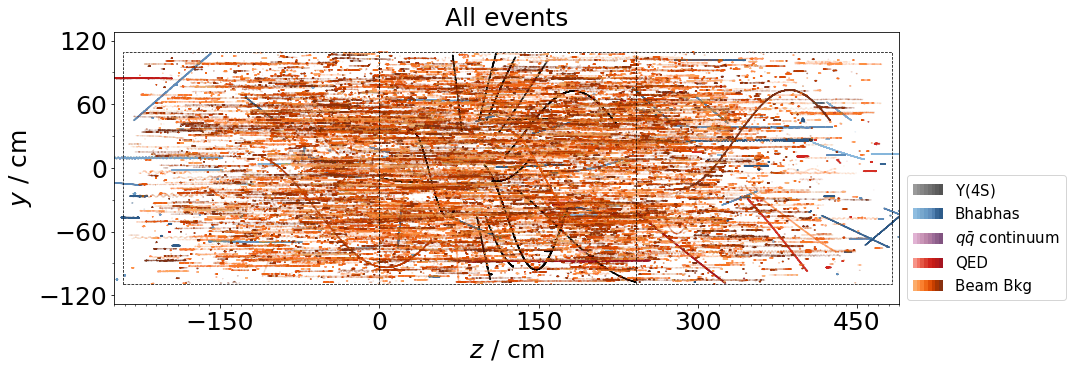

In [19]:
fig = eventplot(TPC, 0, filename_save)
#plt.savefig('TPCOverlaySide.png')

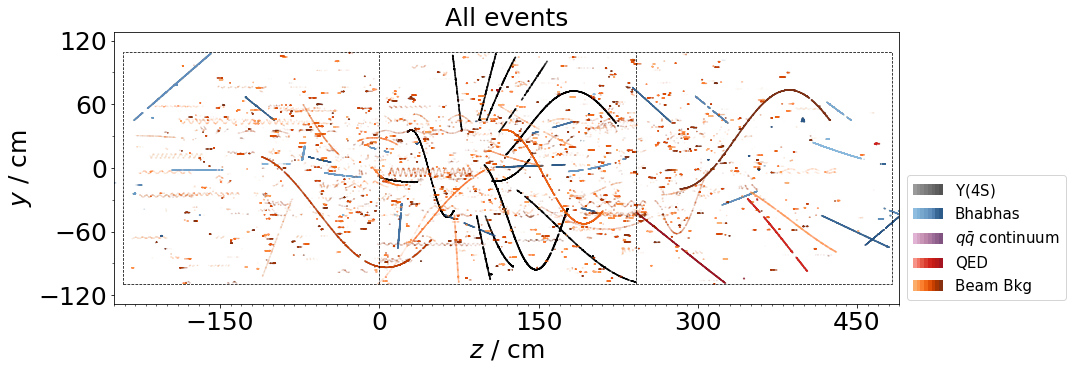

In [20]:
registeredname = filename_save + '_registered'
fig = eventplot(TPCRegistered, 0, registeredname)

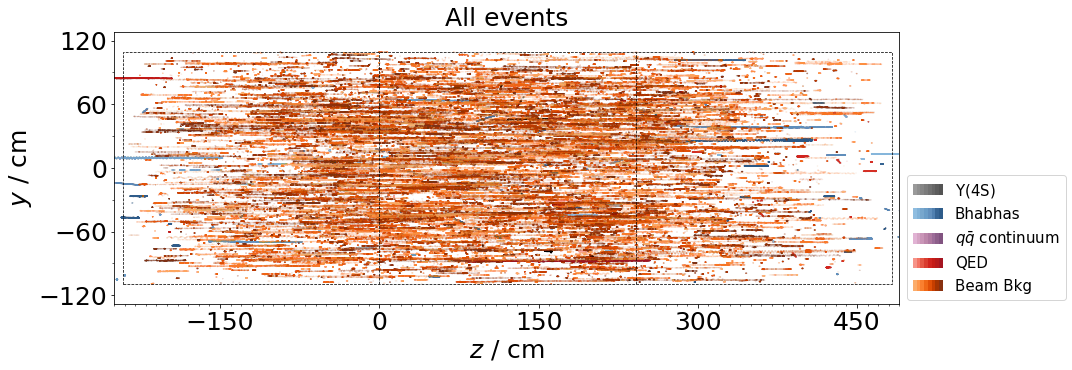

In [21]:
deadname = filename_save + '_discarded'
fig = eventplot(TPCDead, 0, deadname)

In [30]:
TPCBkgDead = TPCDead[TPCDead["eventID"]>=12]
TPCBkgDead

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
1142582,-31.663977,-32.181727,91.001104,11818.325190,-31.67,-32.19,90.95625,11812.5,12,740,4785,11,False
1142583,-31.562332,-32.241048,91.032845,11822.447358,-31.57,-32.25,90.95625,11812.5,12,740,4785,11,False
1142584,-31.423313,-32.213982,91.190774,11842.957678,-31.43,-32.21,91.14875,11837.5,12,740,4785,11,False
1142585,-31.320925,-32.201452,91.251545,11850.849998,-31.33,-32.21,91.34125,11862.5,12,740,4785,11,False
1142586,-77.572235,-25.293882,173.879801,22581.792300,-77.57,-25.29,173.92375,22587.5,12,740,12097,11,False
1142587,-77.710664,-25.218194,173.645442,22551.356053,-77.71,-25.21,173.73125,22562.5,12,740,12097,11,False
1142588,-77.648177,-25.392680,173.936367,22589.138614,-77.65,-25.39,173.92375,22587.5,12,740,12097,11,False
1142589,-77.644335,-25.265257,173.915240,22586.394855,-77.65,-25.27,173.92375,22587.5,12,740,12097,11,False
1142590,-77.717678,-25.310872,173.595293,22544.843278,-77.71,-25.31,173.53875,22537.5,12,740,12097,11,False
1142591,-77.601671,-25.285425,173.826023,22574.808208,-77.61,-25.29,173.73125,22562.5,12,740,12097,11,False


In [31]:
TPCBkg = TPC[TPC["eventID"]>=12]
TPCBkg

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
1142582,-31.663977,-32.181727,91.001104,11818.325190,-31.67,-32.19,90.95625,11812.5,12,740,4785,11,False
1142583,-31.562332,-32.241048,91.032845,11822.447358,-31.57,-32.25,90.95625,11812.5,12,740,4785,11,False
1142584,-31.423313,-32.213982,91.190774,11842.957678,-31.43,-32.21,91.14875,11837.5,12,740,4785,11,False
1142585,-31.320925,-32.201452,91.251545,11850.849998,-31.33,-32.21,91.34125,11862.5,12,740,4785,11,False
1142586,-77.572235,-25.293882,173.879801,22581.792300,-77.57,-25.29,173.92375,22587.5,12,740,12097,11,False
1142587,-77.710664,-25.218194,173.645442,22551.356053,-77.71,-25.21,173.73125,22562.5,12,740,12097,11,False
1142588,-77.648177,-25.392680,173.936367,22589.138614,-77.65,-25.39,173.92375,22587.5,12,740,12097,11,False
1142589,-77.644335,-25.265257,173.915240,22586.394855,-77.65,-25.27,173.92375,22587.5,12,740,12097,11,False
1142590,-77.717678,-25.310872,173.595293,22544.843278,-77.71,-25.31,173.53875,22537.5,12,740,12097,11,False
1142591,-77.601671,-25.285425,173.826023,22574.808208,-77.61,-25.29,173.73125,22562.5,12,740,12097,11,False


In [32]:
print(len(TPCBkgDead)/len(TPCBkg))

0.9240252367439926


In [27]:
TPCNonBkgDead = TPCDead[TPCDead["eventID"]<=11]
TPCNonBkgDead

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
1874,-9.711754,70.065327,111.722951,14509.474193,-9.71,70.07,111.74625,14512.5,1,94,10,-211,False
1875,-9.766510,70.008874,112.096306,14557.961823,-9.77,70.01,112.13125,14562.5,1,94,10,-211,False
1876,-9.701575,70.005151,111.571943,14489.862675,-9.71,70.01,111.55375,14487.5,1,94,10,-211,False
1882,-9.791823,70.021162,111.678048,14503.642638,-9.79,70.03,111.74625,14512.5,1,94,10,-211,False
1886,-9.814849,70.159028,111.795135,14518.848646,-9.81,70.15,111.74625,14512.5,1,94,10,-211,False
1887,-9.759733,70.094166,111.710892,14507.908090,-9.75,70.09,111.74625,14512.5,1,94,10,-211,False
1889,-9.847574,70.121532,111.566256,14489.124146,-9.85,70.13,111.55375,14487.5,1,94,10,-211,False
1890,-9.684143,70.138345,111.717988,14508.829555,-9.69,70.13,111.74625,14512.5,1,94,10,-211,False
1891,-9.667318,70.000486,111.705806,14507.247593,-9.67,70.01,111.74625,14512.5,1,94,10,-211,False
1892,-9.769504,70.143307,111.921310,14535.235100,-9.77,70.15,111.93875,14537.5,1,94,10,-211,False


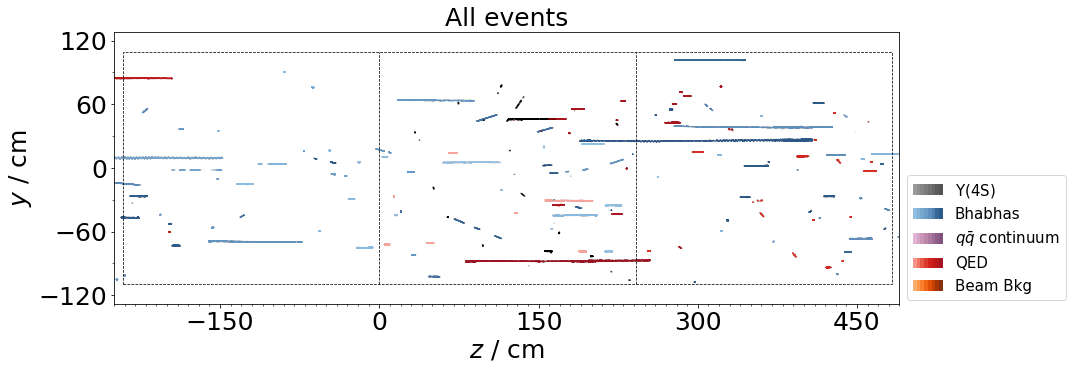

In [28]:
nonbkgdeadname = filename_save + '_discardedNonBkg'
fig = eventplot(TPCNonBkgDead, 0, nonbkgdeadname)

In [17]:
TPCUpsiDead = TPCDead[TPCDead["eventID"]==1]
TPCUpsiDead

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
1874,-9.711754,70.065327,111.722951,14509.474193,-9.71,70.07,111.74625,14512.5,1,94,10,-211,False
1875,-9.766510,70.008874,112.096306,14557.961823,-9.77,70.01,112.13125,14562.5,1,94,10,-211,False
1876,-9.701575,70.005151,111.571943,14489.862675,-9.71,70.01,111.55375,14487.5,1,94,10,-211,False
1882,-9.791823,70.021162,111.678048,14503.642638,-9.79,70.03,111.74625,14512.5,1,94,10,-211,False
1886,-9.814849,70.159028,111.795135,14518.848646,-9.81,70.15,111.74625,14512.5,1,94,10,-211,False
1887,-9.759733,70.094166,111.710892,14507.908090,-9.75,70.09,111.74625,14512.5,1,94,10,-211,False
1889,-9.847574,70.121532,111.566256,14489.124146,-9.85,70.13,111.55375,14487.5,1,94,10,-211,False
1890,-9.684143,70.138345,111.717988,14508.829555,-9.69,70.13,111.74625,14512.5,1,94,10,-211,False
1891,-9.667318,70.000486,111.705806,14507.247593,-9.67,70.01,111.74625,14512.5,1,94,10,-211,False
1892,-9.769504,70.143307,111.921310,14535.235100,-9.77,70.15,111.93875,14537.5,1,94,10,-211,False


In [18]:
TPCUpsiLive = TPCRegistered[TPCRegistered["eventID"]==1]
TPCUpsiLive

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
0,-1.531283,44.890178,101.173864,13139.462842,-1.53,44.89,101.15875,13137.5,1,94,10,-211,True
1,-1.522498,44.912207,101.119068,13132.346487,-1.53,44.91,101.15875,13137.5,1,94,10,-211,True
2,-1.553065,44.958035,101.402884,13169.205753,-1.55,44.95,101.35125,13162.5,1,94,10,-211,True
3,-1.476252,44.981465,100.854908,13098.040042,-1.47,44.99,100.77375,13087.5,1,94,10,-211,True
4,-1.641313,45.012802,100.720900,13080.636395,-1.65,45.01,100.77375,13087.5,1,94,10,-211,True
5,-1.577461,44.936152,101.224139,13145.992079,-1.57,44.93,101.15875,13137.5,1,94,10,-211,True
6,-1.465486,44.911676,100.945801,13109.844249,-1.47,44.91,100.96625,13112.5,1,94,10,-211,True
7,-1.497878,44.983873,100.801344,13091.083625,-1.49,44.99,100.77375,13087.5,1,94,10,-211,True
8,-1.590812,45.034911,100.929552,13107.734068,-1.59,45.03,100.96625,13112.5,1,94,10,-211,True
9,-1.445874,44.909843,101.321687,13158.660696,-1.45,44.91,101.35125,13162.5,1,94,10,-211,True


In [19]:
reghits = len(TPCUpsiLive)
dedhits = len(TPCUpsiDead)
print(reghits/(reghits+dedhits))

0.8005558005558006


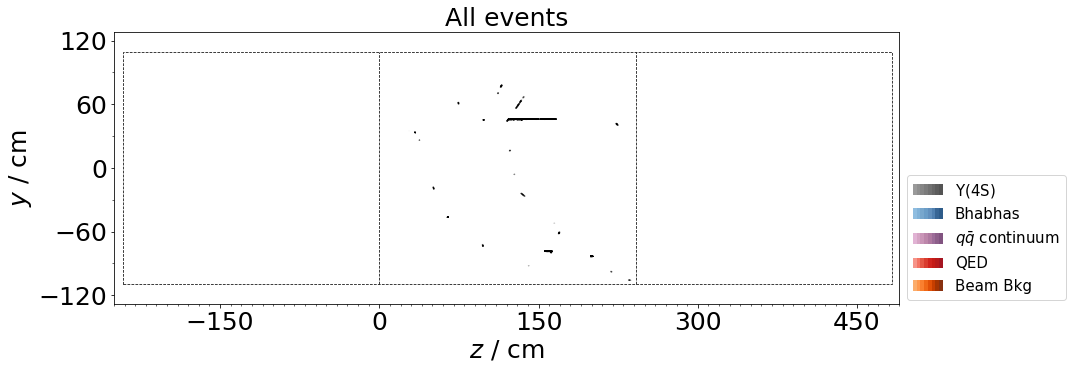

In [26]:
upsideadname = filename_save + '_discardedUpsi'
fig = eventplot(TPCUpsiDead, 0, upsideadname)

In [ ]:
upsikeptname = filename_save + '_keptUpsi'
fig = eventplot(TPCUpsiLive, 0, upsikeptname)

with PdfPages('TPCBkgOverlayBG19_1.pdf') as pdf:
    for i in range(1):
        if i == 0:
            eventtypedata = TPC
            #continue
        else:
            eventtypedata = TPC[TPC['eventID']==i]
        
        fig = eventplot(eventtypedata, i)
        pdf.savefig(fig)
        
    

In [12]:
def eventplotxy(dataFrame, eventtype, datatype=""):
    
    xname = 'x'+datatype
    yname = 'y'+datatype
    
    fig, ax = plt.subplots()
    x = dataFrame[xname]
    y = dataFrame[yname]
    eventtypenames = ['All', r'$\Upsilon$(4S)', 'Bhabha', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$', 'Brems HER', 'Brems LER', 'Coulomb HER', 'Coulomb LER', 'Touschek HER', 'Touschek LER']
    colormaps=[grey_tableau, blue_tableau, red_tableau, red_tableau, red_tableau, purple_tableau, purple_tableau, purple_tableau, purple_tableau, red_tableau, red_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau]
    eventIndex=dataFrame['eventIndex']
    maxIndex = eventIndex.max()
    upsiindex = eventIndex
    if eventtype == 1:
        upsiindex = eventIndex/(dataFrame['eventIndex'].iloc[0])
        upsiindex = 1- (upsiindex % 1)
    colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
    
    circle1 = plt.Circle((0, 0), 44.85, color='black', fill=False, ls='--', lw=0.75, label='TPC cage')
    circle2 = plt.Circle((0, 0), 109.4, color='black', fill=False, ls='--', lw=0.75) 
    
    if eventtype == 0:
        for i in range(1,18):
            dataTrue = dataFrame[dataFrame['eventID']==i]
            x = dataTrue[xname]
            y = dataTrue[yname]
            eventIndex=dataTrue["eventIndex"]
            maxIndex = eventIndex.max()
            if i==1:
                upsiindex = eventIndex/(dataFrame['eventIndex'].iloc[0])
                upsiindex = 1- (upsiindex % 1)
            colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
    
            tpchits = ax.scatter(x, y, marker='.', s=0.001, c=colors[i-1], cmap=colormaps[i-1], vmin=0.0, vmax=1.0)

    else:
        tpchits = ax.scatter(x, y, marker='.', s = 0.001, c=colors[eventtype-1], cmap=colormaps[eventtype-1], vmin=0.0, vmax=1.0)
        
    ax.set_xlabel('$x$ / cm', fontsize=25)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_minor_locator(MultipleLocator(30))
    ax.set_xlim(-128, 128)

    ax.set_ylabel('$y$ / cm', fontsize=25)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(30))
    ax.set_ylim(-128, 128)
    
    ax.set_aspect('equal')
    ax.tick_params(labelsize=25)
    
    tpccage = ax.add_artist(circle1)
    
    cmaps = [grey_tableau, blue_tableau, purple_tableau, red_tableau, orange_tableau]
    cmap_labels = [r"$\Upsilon$(4S)","Bhabhas", r"$q\bar{q}$ continuum", "QED", "Beam Bkg"]
    # create proxy artists as handles:
    cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
    handler_map = dict(zip(cmap_handles, 
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
    #cmap_labels.append("Upsilon(4S)")
    #cmap_handels.append(tpcsimhits)
    
    plt.legend(handles=cmap_handles, 
           labels=cmap_labels, 
           handler_map=handler_map,
           bbox_to_anchor=(1., 1),
           loc='upper left',
           fontsize=15)
        
    fig.set_size_inches(15, 15)
    plt.title(eventtypenames[eventtype]+' events', fontsize=25)
    # lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
    # lgnd.legendHandles[0]._sizes = [35]
    fig.tight_layout()
    #ax.set_rasterized(True)
    plt.savefig('plotsField/simplerejection/TPCOverlayFront'+filename_save)
    plt.show()
    plt.close()
    return fig

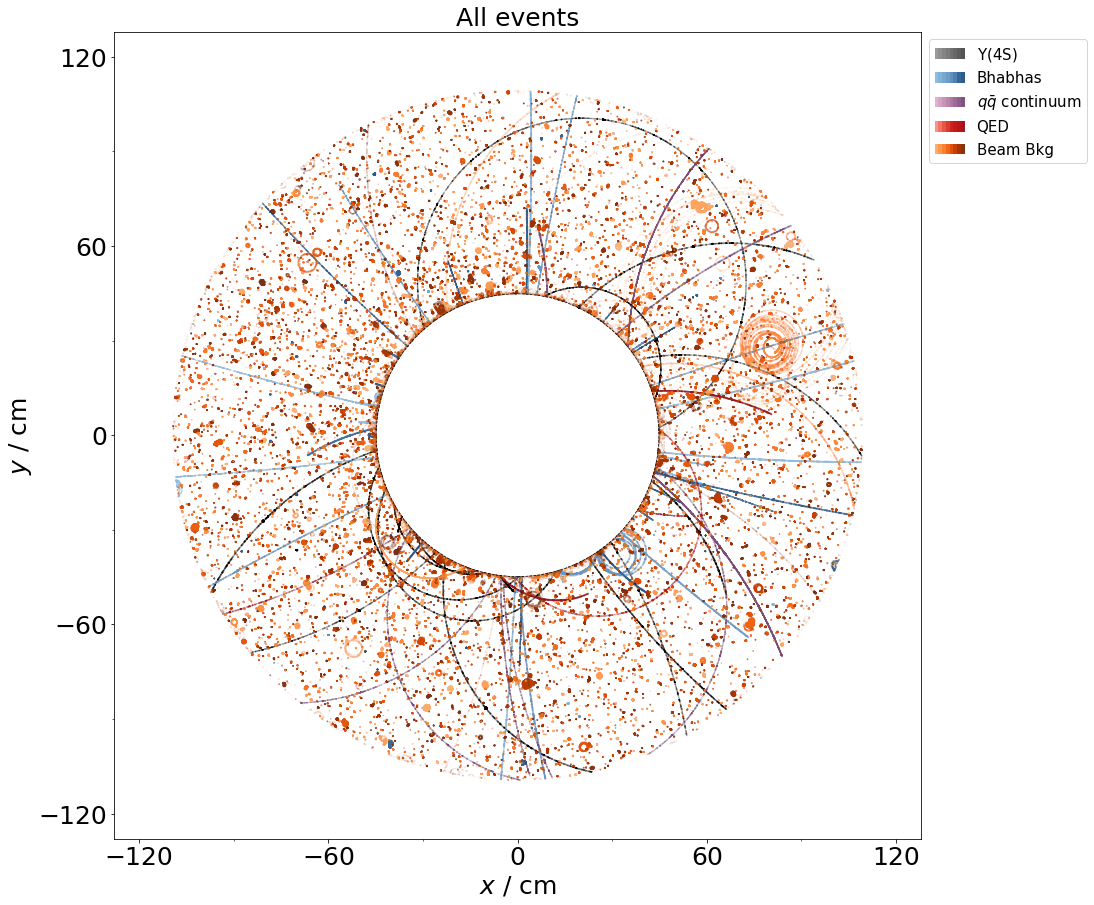

In [54]:
fig = eventplotxy(TPC, 0)

with PdfPages('TPCBkgOverlayBG19_1xy.pdf') as pdf:
    for i in range(1):
        if i == 0:
            eventtypedata = TPC
            #continue
        else:
            eventtypedata = TPC[TPC['eventID']==i]
        
        fig = eventplotxy(eventtypedata, i)
        pdf.savefig(fig)

# Hits lost to Deadtime&Rejection

In [97]:
filename = '/gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p50d750/TPCEventOverlay2048260084.root'
filename_save = filename[84:-5]
print(filename_save)

2048260084


In [64]:
TPCTest = TPC[TPC["eventIndex"] == TPC["eventIndex"][0]]
TPCTest = TPCTest[TPCTest["eventID"] == 1]
TPCTest

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
0,-36.672664,-25.838872,7.541854,979.461514,-36.5,-25.5,7.60375,987.5,1,7,12,-321,True
1,-36.682982,-25.837883,7.381814,958.677093,-36.5,-25.5,7.41125,962.5,1,7,12,-321,True
2,-36.690922,-25.814854,7.535145,978.590264,-36.5,-25.5,7.60375,987.5,1,7,12,-321,True
3,-36.688227,-25.828888,7.354737,955.160706,-36.5,-25.5,7.41125,962.5,1,7,12,-321,True
4,-36.680099,-25.842596,7.344285,953.803207,-36.5,-25.5,7.41125,962.5,1,7,12,-321,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187604,45.275397,25.142051,96.028820,12471.275382,45.5,25.5,95.96125,12462.5,1,7,22611,11,True
187605,45.247260,25.103946,95.779588,12438.907580,45.5,25.5,95.76875,12437.5,1,7,22611,11,True
187606,45.368541,25.131020,96.062580,12475.659762,45.5,25.5,96.15375,12487.5,1,7,22611,11,True
187607,45.349202,25.098153,96.191601,12492.415705,45.5,25.5,96.15375,12487.5,1,7,22611,11,True


In [83]:
len(TPCTest)

187609

In [73]:
returns = TPCTest['registered'].value_counts(normalize=True)
returns[1]

0.9949949096258708

In [135]:
def count_deadhits(filename, directory):
    filename = directory + '/' + filename
    filename_save  = filename[84:-5]
    #print(filename_save)
    
    TPCfunc = root_pandas.read_root(filename, 'tree')
    TPCfunc = TPCfunc[TPCfunc["eventIndex"] == TPCfunc["eventIndex"][0]]
    TPCfunc = TPCfunc[TPCfunc["eventID"] == 1]
    
    total = len(TPCfunc)
    
    TPCt = TPCfunc[TPCfunc["registered"] == True]
    TPCf = TPCfunc[TPCfunc["registered"] == False]
    
    #values = TPCF['registered'].value_counts(normalize=True)
    #print(len(TPCt)/total, len(TPCf)/total)
    
    return len(TPCt)/total, len(TPCf)/total
    
    

In [126]:
def Average(lst):
    return sum(lst) / len(lst)

In [152]:

meantrues = []
meandeads = []
stdtrues = []
stddeads = []


def fill_means(directory):
    extensions = ('.root')
    trues = []
    deads = []
    for f in os.listdir(directory):   
        ext = os.path.splitext(f)[-1].lower()
        if ext in extensions:
            
            regs, nots  = count_deadhits(f, directory)
            #print(f)
            #print(values[1], values[0])
            trues.append(regs)
            deads.append(nots)
            
    trues_array = np.array(trues)
    deads_array = np.array(deads)
            
    meantrues.append(trues_array.mean())
    meandeads.append(deads_array.mean())
    stdtrues.append(trues_array.std())
    stddeads.append(deads_array.std())
            
    print(meantrues)
    print(meandeads)
        
        
        
        #print(f)

In [153]:
fill_means('/gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p50d750')
fill_means('/gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p200d750')
fill_means('/gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p1000d750')

[0.9999834941465929]
[1.6505853406903937e-05]
[0.9999834941465929, 0.9999426768928203]
[1.6505853406903937e-05, 5.732310717957348e-05]
[0.9999834941465929, 0.9999426768928203, 0.9995028051440504]
[1.6505853406903937e-05, 5.732310717957348e-05, 0.0004971948559493886]


Warning in <TFile::Init>: file /gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p1000d750/TPCEventOverlay1060696879.root probably not closed, trying to recover
Info in <TFile::Recover>: /gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p1000d750/TPCEventOverlay1060696879.root, recovered key TTree:tree at address 123789644
Warning in <TFile::Init>: successfully recovered 1 keys
Warning in <TFile::Init>: file /gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p1000d750/TPCEventOverlay1060696879.root probably not closed, trying to recover
Info in <TFile::Recover>: /gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p1000d750/TPCEventOverlay1060696879.root, recovered key TTree:tree at address 123789644
Warning in <TFile::Init>: successfully recovered 1 keys
Warning in <TFile::Init>: file /gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p1000d750/TPCEventOverlay1060696879.root probably not closed, trying to recover
Info in <TFile::Recove

In [154]:
meantrues750 = meantrues
meandeads750 = meandeads
stdtrues750 = stdtrues
stddeads750 = stddeads

In [155]:
meantrues = []
meandeads = []
stdtrues = []
stddeads = []

fill_means('/gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p50d2000')
fill_means('/gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p200d2000')
fill_means('/gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p1000d2000')

meantrues2000 = meantrues
meandeads2000 = meandeads
stdtrues2000 = stdtrues
stddeads2000 = stddeads

[0.9999846655112151]
[1.5334488784793184e-05]
[0.9999846655112151, 0.999923689367159]
[1.5334488784793184e-05, 7.631063284118789e-05]
[0.9999846655112151, 0.999923689367159, 0.9997925857196176]
[1.5334488784793184e-05, 7.631063284118789e-05, 0.00020741428038232554]


In [157]:
meantrues = []
meandeads = []
stdtrues = []
stddeads = []

fill_means('/gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p50d500')
fill_means('/gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p200d500')
fill_means('/gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p1000d500')

meantrues500 = meantrues
meandeads500 = meandeads
stdtrues500 = stdtrues
stddeads500 = stddeads

[0.9999969311550438]
[3.0688449562036582e-06]
[0.9999969311550438, 0.9999586189819123]
[3.0688449562036582e-06, 4.1381018087778e-05]
[0.9999969311550438, 0.9999586189819123, 0.9997983400099892]
[3.0688449562036582e-06, 4.1381018087778e-05, 0.00020165999001077627]


Warning in <TFile::Init>: file /gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p1000d500/TPCEventOverlay3330335890.root probably not closed, trying to recover
Info in <TFile::Recover>: /gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p1000d500/TPCEventOverlay3330335890.root, recovered key TTree:tree at address 91780275
Warning in <TFile::Init>: successfully recovered 1 keys
Warning in <TFile::Init>: file /gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p1000d500/TPCEventOverlay3330335890.root probably not closed, trying to recover
Info in <TFile::Recover>: /gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p1000d500/TPCEventOverlay3330335890.root, recovered key TTree:tree at address 91780275
Warning in <TFile::Init>: successfully recovered 1 keys
Warning in <TFile::Init>: file /gpfs/group/belle2/users/loeschca/ElectricField/dataDeadtime/p1000d500/TPCEventOverlay3330335890.root probably not closed, trying to recover
Info in <TFile::Recover>

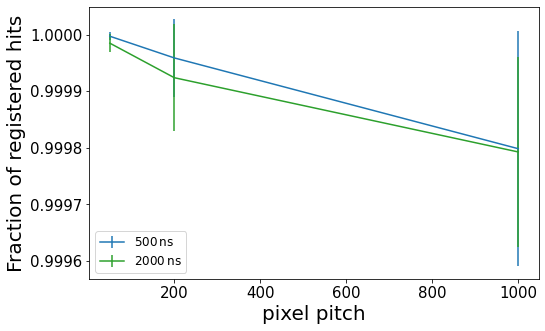

In [171]:
pitches = [50, 200, 1000]

fig, ax = plt.subplots()
plt.errorbar(pitches, meantrues500, yerr=stdtrues500, label=r'$500\,$ns')
#plt.errorbar(pitches, meantrues750, yerr=stdtrues750, label=r'$750\,$ns')
plt.errorbar(pitches, meantrues2000, yerr=stdtrues2000, label=r'$2000\,$ns', color='C2')
fig.set_size_inches(8.05, 5)
#plt.title(r"pT res with 55$\,\mu$m pitch for various electron efficiencies", fontsize=15)
plt.xlabel(r'pixel pitch', fontsize=20)
plt.ylabel(r'Fraction of registered hits', fontsize=20)
ax.tick_params(labelsize=15)
#ax.set_yscale('log')
plt.legend(fontsize=12, loc=3)

In [96]:
deads

[1.4611071539459025e-05,
 0.0,
 0.0,
 0.0,
 3.409675978491764e-06,
 5.157031612603785e-06,
 8.691545733465058e-06,
 0.0,
 1.9560794950706796e-05,
 5.386915183020443e-05,
 4.7027840481565085e-05,
 7.326490391307852e-06,
 6.465963169873784e-06,
 1.4865762167626335e-05,
 6.583092736967828e-05,
 2.2853486299334964e-05,
 0.0,
 0.0,
 2.1117094287825995e-05,
 3.158410056377619e-05,
 3.7666911501591424e-05,
 2.573273976480276e-05,
 1.0369894123381e-05,
 0.0]

## BkgRejection

In [27]:
Bhabhas = TPC[TPC['eventID']==2]
Bhabhas

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
187609,42.069404,15.702011,-137.378751,-17841.396270,42.5,15.5,-137.15625,-17812.5,2,8752,2,-11,True
187610,42.063564,15.723286,-137.832598,-17900.337443,42.5,15.5,-137.73375,-17887.5,2,8752,2,-11,True
187611,42.110996,15.590145,-138.084568,-17933.060730,42.5,15.5,-137.92625,-17912.5,2,8752,2,-11,True
187612,42.040664,15.659349,-137.859636,-17903.848821,42.5,15.5,-137.73375,-17887.5,2,8752,2,-11,True
187613,42.089353,15.602737,-137.655711,-17877.365094,42.5,15.5,-137.54125,-17862.5,2,8752,2,-11,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
715432,-16.203697,-67.512341,315.757210,41007.429898,-16.5,-67.5,315.79625,41012.5,2,18287,9353,11,True
715433,-16.164392,-67.578268,316.036866,41043.748883,-16.5,-67.5,315.98875,41037.5,2,18287,9353,11,True
715434,-16.157684,-67.458624,315.721030,41002.731203,-16.5,-67.5,315.79625,41012.5,2,18287,9353,11,True
715435,-16.174115,-67.469805,315.599574,40986.957656,-16.5,-67.5,315.60375,40987.5,2,18287,9353,11,True


In [28]:
bhabhaindices = Bhabhas.eventIndex.unique().tolist()
bhabhaindices

[8752,
 16771,
 1315,
 14494,
 13858,
 13953,
 1244,
 17534,
 15716,
 6959,
 11036,
 9257,
 15685,
 16080,
 6952,
 15575,
 17242,
 736,
 1409,
 3040,
 3752,
 4821,
 2092,
 551,
 15651,
 3826,
 18287]

with PdfPages('bhabhaTest_events.pdf') as pdf:
    for i in bhabhaindices:
        
        data = Bhabhas[Bhabhas['eventIndex']==i]
        
        fig = bhabhaplot(data, i)
        pdf.savefig(fig)

## Counting tracks

In [29]:
TPCVolume = TPC[(TPC['z']>=0) & (TPC['z']<=241.69)]
TPCVolume

,x,y,z,t,xReco,yReco,zReco,tReco,eventID,eventIndex,trackID,pdg,registered
0,-36.672664,-25.838872,7.541854,979.461514,-36.5,-25.5,7.60375,987.5,1,7,12,-321,True
1,-36.682982,-25.837883,7.381814,958.677093,-36.5,-25.5,7.41125,962.5,1,7,12,-321,True
2,-36.690922,-25.814854,7.535145,978.590264,-36.5,-25.5,7.60375,987.5,1,7,12,-321,True
3,-36.688227,-25.828888,7.354737,955.160706,-36.5,-25.5,7.41125,962.5,1,7,12,-321,True
4,-36.680099,-25.842596,7.344285,953.803207,-36.5,-25.5,7.41125,962.5,1,7,12,-321,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5330583,-31.426269,69.270204,193.982075,25192.477278,-31.5,69.5,193.94375,25187.5,17,43130,13136,11,True
5330584,-31.420554,69.260482,193.873179,25178.334903,-31.5,69.5,193.94375,25187.5,17,43130,13136,11,True
5330585,-31.464317,69.308271,193.737744,25160.745944,-31.5,69.5,193.75125,25162.5,17,43130,13136,11,True
5330586,-31.403483,69.287063,193.835646,25173.460493,-31.5,69.5,193.75125,25162.5,17,43130,13136,11,True


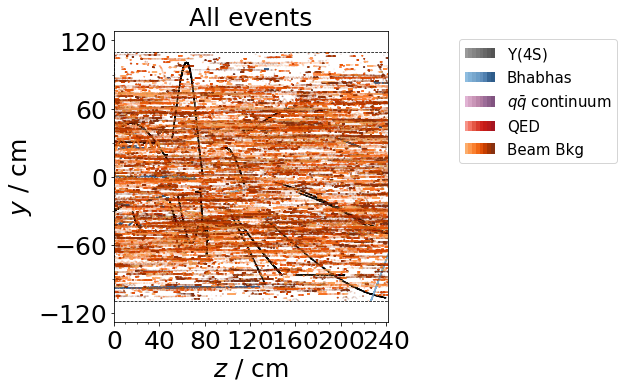

In [30]:
eventtype = 0
fig, ax = plt.subplots()
x = TPCVolume['z']
y = TPCVolume['y']
eventtypenames = ['All', r'$\Upsilon$(4S)', 'Bhabha', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$', 'Brems HER', 'Brems LER', 'Coulomb HER', 'Coulomb LER', 'Touschek HER', 'Touschek LER']
colormaps=[grey_tableau, blue_tableau, red_tableau, red_tableau, red_tableau, purple_tableau, purple_tableau, purple_tableau, purple_tableau, red_tableau, red_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau]
eventIndex=TPCVolume['eventIndex']
maxIndex = eventIndex.max()
upsiindex = eventIndex
if eventtype == 1:
    upsiindex = eventIndex/(TPCVolume['eventIndex'].iloc[0])
    upsiindex = 1- (upsiindex % 1)
colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
  
rect1 = plt.Rectangle((-241.69,-109.4), 725.07, 218.8 ,linewidth=0.75,edgecolor='black',facecolor='none', ls='--', label='TPC cage')
plt.vlines(x=0, ymin=-109.4, ymax=109.4, lw=0.75, ls='--')
plt.vlines(x=241.69, ymin=-109.4, ymax=109.4, lw=0.75, ls='--') 
    

for i in range(1,18):
    dataTrue = TPCVolume[TPCVolume['eventID']==i]
    x = dataTrue["z"]
    y = dataTrue["y"]
    eventIndex=dataTrue["eventIndex"]
    maxIndex = eventIndex.max()
    if i==1:
        upsiindex = eventIndex/(TPCVolume['eventIndex'].iloc[0])
        upsiindex = 1- (upsiindex % 1)
    colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]

    tpchits = ax.scatter(x, y, marker='.', s=0.001, c=colors[i-1], cmap=colormaps[i-1], vmin=0.0, vmax=1.0)
        
ax.set_xlabel('$z$ / cm', fontsize=25)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.set_xlim(-0, 241.69)

ax.set_ylabel('$y$ / cm', fontsize=25)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(30))
ax.set_ylim(-128, 128)
    
ax.set_aspect('equal')
ax.tick_params(labelsize=25)
    
tpccage = ax.add_artist(rect1)
    
cmaps = [grey_tableau, blue_tableau, purple_tableau, red_tableau, orange_tableau]
cmap_labels = [r"$\Upsilon$(4S)","Bhabhas", r"$q\bar{q}$ continuum", "QED", "Beam Bkg"]
# create proxy artists as handles:
cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
handler_map = dict(zip(cmap_handles, 
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
    #cmap_labels.append("Upsilon(4S)")
    #cmap_handels.append(tpcsimhits)
    
plt.legend(handles=cmap_handles, 
        labels=cmap_labels, 
        handler_map=handler_map,
        bbox_to_anchor=(1.23, 1),
        fontsize=15)
        
fig.set_size_inches(15, 5.5)
plt.title(eventtypenames[eventtype]+' events', fontsize=25)
# lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
# lgnd.legendHandles[0]._sizes = [35]
fig.tight_layout()
#ax.set_rasterized(True)
#plt.savefig('physicshits_BG19x1.pdf',bbox_extra_artists=(lgnd,), bbox_inches='tight')
plt.savefig('physicshits_BG19x1.png')

plt.show()
plt.close()

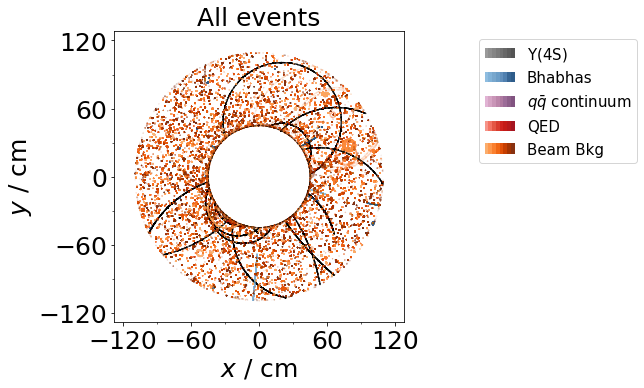

In [31]:
eventtype = 0
fig, ax = plt.subplots()
x = TPCVolume['x']
y = TPCVolume['y']
eventtypenames = ['All', r'$\Upsilon$(4S)', 'Bhabha', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$', 'Brems HER', 'Brems LER', 'Coulomb HER', 'Coulomb LER', 'Touschek HER', 'Touschek LER']
colormaps=[grey_tableau, blue_tableau, red_tableau, red_tableau, red_tableau, purple_tableau, purple_tableau, purple_tableau, purple_tableau, red_tableau, red_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau, orange_tableau]
eventIndex=TPCVolume['eventIndex']
maxIndex = eventIndex.max()
upsiindex = eventIndex
if eventtype == 1:
    upsiindex = eventIndex/(TPCVolume['eventIndex'].iloc[0])
    upsiindex = 1- (upsiindex % 1)
colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]
  
circle1 = plt.Circle((0, 0), 44.85, color='black', fill=False, ls='--', lw=0.75, label='TPC cage')
circle2 = plt.Circle((0, 0), 109.4, color='black', fill=False, ls='--', lw=0.75) 
    

for i in range(1,18):
    dataTrue = TPCVolume[TPCVolume['eventID']==i]
    x = dataTrue["x"]
    y = dataTrue["y"]
    eventIndex=dataTrue["eventIndex"]
    maxIndex = eventIndex.max()
    if i==1:
        upsiindex = eventIndex/(TPCVolume['eventIndex'].iloc[0])
        upsiindex = 1- (upsiindex % 1)
    colors = [upsiindex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex, eventIndex/maxIndex]

    tpchits = ax.scatter(x, y, marker='.', s=0.001, c=colors[i-1], cmap=colormaps[i-1], vmin=0.0, vmax=1.0)
        
ax.set_xlabel('$x$ / cm', fontsize=25)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(30))
ax.set_xlim(-128, 128)

ax.set_ylabel('$y$ / cm', fontsize=25)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(30))
ax.set_ylim(-128, 128)
    
ax.set_aspect('equal')
ax.tick_params(labelsize=25)
    
tpccage = ax.add_artist(circle1)
    
cmaps = [grey_tableau, blue_tableau, purple_tableau, red_tableau, orange_tableau]
cmap_labels = [r"$\Upsilon$(4S)","Bhabhas", r"$q\bar{q}$ continuum", "QED", "Beam Bkg"]
# create proxy artists as handles:
cmap_handles = [Rectangle((0, 0), 1, 1) for _ in cmaps]
handler_map = dict(zip(cmap_handles, 
                       [HandlerColormap(cm, num_stripes=8) for cm in cmaps]))
    #cmap_labels.append("Upsilon(4S)")
    #cmap_handels.append(tpcsimhits)
    
plt.legend(handles=cmap_handles, 
        labels=cmap_labels, 
        handler_map=handler_map,
        bbox_to_anchor=(1.23, 1),
        fontsize=15)
        
fig.set_size_inches(15, 5.5)
plt.title(eventtypenames[eventtype]+' events', fontsize=25)
# lgnd = plt.legend(handles=[tpchits, tpccage],loc=2, prop={'size':15})
# lgnd.legendHandles[0]._sizes = [35]
fig.tight_layout()
#ax.set_rasterized(True)
#plt.savefig('physicshits_BG19x1.pdf',bbox_extra_artists=(lgnd,), bbox_inches='tight')
plt.savefig('physicshitsxy_BG19x1.png')

plt.show()
plt.close()

In [32]:
for p in range(18):
    print(len(TPCVolume[TPCVolume["eventID"]==p]))

0
187599
100383
0
0
0
0
0
0
0
0
0
79771
68883
202429
1537002
17761
402141


In [33]:
TPCUniqueTracks = TPCVolume.groupby(['eventID']).size().reset_index().rename(columns={0:'count'})
#TPCCutVolume = TPCCutVolume[TPCCutVolume['count']>=1000]
#TPCUniqueTracks = TPCUniqueTracks[(TPCUniqueTracks['pdg'] != 11) | ((TPCUniqueTracks['pdg']==11) & (TPCUniqueTracks['eventID']==2) & (TPCUniqueTracks['trackID'] <=2)) | ((TPCUniqueTracks['pdg']==11) & (TPCUniqueTracks['eventID']!=2) & (TPCUniqueTracks['trackID'] <=4))]
TPCUniqueTracks

,eventID,count
0,1,187599
1,2,100383
2,12,79771
3,13,68883
4,14,202429
5,15,1537002
6,16,17761
7,17,402141


In [34]:
TPCUniqueTracks["count"]

0     187599
1     100383
2      79771
3      68883
4     202429
5    1537002
6      17761
7     402141
Name: count, dtype: int64

In [35]:
eventplot(TPCVolume, 0)

TypeError: eventplot() missing 1 required positional argument: 'filename_save'

# Histogramming number of Hits

In [96]:
def count_hits(filename):
    hitarray = []
    filename = '/gpfs/group/belle2/users/loeschca/dataTPCBkgNoSafety/'+filename
    TPC = root_pandas.read_root(filename, 'tree')
    TPCVolume = TPC[(TPC['z']>=0) & (TPC['z']<=241.69)]
    for p in range(1,18):
        hitarray.append(len(TPCVolume[TPCVolume["eventID"]==p]))
    return hitarray    

In [76]:
nfiles =25

In [97]:

hits = np.zeros(shape=(17, nfiles))

#tracklist = count_tracks('dataTPC/TPCEventOverlay3825921711.root')
#tracklist
i=0

for f in os.listdir('/gpfs/group/belle2/users/loeschca/dataTPCBkgNoSafety/'):
    hitlist = count_hits(f)
    print(hitlist)
    print(f)
    
    for j in range(0,17):
        hits[j][i]=hitlist[j]
    i+=1
    
hits[0][0]



[92636, 114518, 0, 0, 49268, 0, 0, 0, 0, 1081, 0, 502351, 430177, 1554474, 10467627, 152070, 2564110]
TPCEventOverlay146789868.root
[153545, 91521, 0, 0, 0, 0, 0, 0, 0, 0, 19928, 520640, 351810, 1247119, 12082640, 50027, 2225802]
TPCEventOverlay4075948625.root
[170571, 63580, 0, 0, 0, 0, 0, 0, 0, 3483, 15521, 537992, 517749, 1102923, 11237446, 337177, 2663110]
TPCEventOverlay3369969395.root
[383650, 38108, 0, 0, 0, 0, 0, 0, 0, 5761, 0, 553087, 507514, 1121391, 11955715, 81353, 3161245]
TPCEventOverlay339412100.root
[78634, 102977, 0, 0, 0, 0, 0, 0, 0, 11470, 0, 742266, 556189, 1152556, 11032053, 81054, 2629771]
TPCEventOverlay2927543052.root
[193923, 127041, 0, 0, 0, 0, 0, 0, 0, 9680, 7457, 492786, 486720, 1267664, 10939786, 226766, 2543514]
TPCEventOverlay447498651.root
[56188, 36395, 0, 0, 0, 0, 0, 0, 0, 0, 5581, 409175, 398915, 1012628, 12255498, 192886, 2677139]
TPCEventOverlay2227524210.root
[273735, 108759, 0, 0, 0, 0, 0, 0, 0, 59665, 0, 399719, 450799, 1395454, 11820162, 187399,

92636.0

In [80]:
hits

array([[1.8891200e+05, 1.8189400e+05, 5.0123600e+05, 8.7848000e+04,
        8.4366000e+04, 5.6204000e+04, 1.9409500e+05, 1.8931600e+05,
        1.4895400e+05, 7.7725000e+04, 5.3748100e+05, 9.4573000e+04,
        6.3302000e+04, 9.4600000e+04, 4.3721000e+04, 1.3619400e+05,
        1.9040700e+05, 1.2744500e+05, 3.4220200e+05, 1.9462300e+05,
        1.0172600e+05, 8.2373000e+04, 1.0618000e+05, 1.6010200e+05,
        1.5563800e+05],
       [1.9180700e+05, 4.8042000e+04, 7.9491000e+04, 6.6441000e+04,
        7.3037000e+04, 1.8393800e+05, 7.1465000e+04, 1.7927900e+05,
        1.4626800e+05, 1.3878900e+05, 1.0333100e+05, 2.0550700e+05,
        1.3866500e+05, 9.2482000e+04, 2.0502100e+05, 1.0802600e+05,
        1.0051100e+05, 1.4003400e+05, 9.6909000e+04, 1.1233400e+05,
        9.4311000e+04, 1.2211000e+05, 2.6308000e+04, 1.0738000e+05,
        7.0269000e+04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,


In [98]:
sumbkghits = np.zeros(nfiles)
for i in range(nfiles):
    sumbkghits[i] = hits[11][i] + hits[12][i] + hits[13][i] + hits[14][i] +hits[15][i] +hits[16][i]
#sumbkghits[0] = hits[11][0] + hits[12][0] + hits[13][0] + hits[14][0] +hits[15][0] +hits[16][0]
sumbkghits

array([15670809., 16478038., 16396397., 17380305., 16193889., 15957236.,
       16946241., 17029823., 16480852., 15048667., 15987753., 15830021.,
       17020683., 16438198., 16043504., 16368774., 16462204., 16563959.,
       16844107., 17217142., 15780371., 16992606., 16312782., 17791610.,
       16156911.])

In [99]:
maxtrax=np.amax(hits)
maxtrax

12255498.0

In [100]:
bins = []
for i in range(int(np.amax(hits))+1):
    bins.append(i - 0.5)
bins

[-0.5,
 0.5,
 1.5,
 2.5,
 3.5,
 4.5,
 5.5,
 6.5,
 7.5,
 8.5,
 9.5,
 10.5,
 11.5,
 12.5,
 13.5,
 14.5,
 15.5,
 16.5,
 17.5,
 18.5,
 19.5,
 20.5,
 21.5,
 22.5,
 23.5,
 24.5,
 25.5,
 26.5,
 27.5,
 28.5,
 29.5,
 30.5,
 31.5,
 32.5,
 33.5,
 34.5,
 35.5,
 36.5,
 37.5,
 38.5,
 39.5,
 40.5,
 41.5,
 42.5,
 43.5,
 44.5,
 45.5,
 46.5,
 47.5,
 48.5,
 49.5,
 50.5,
 51.5,
 52.5,
 53.5,
 54.5,
 55.5,
 56.5,
 57.5,
 58.5,
 59.5,
 60.5,
 61.5,
 62.5,
 63.5,
 64.5,
 65.5,
 66.5,
 67.5,
 68.5,
 69.5,
 70.5,
 71.5,
 72.5,
 73.5,
 74.5,
 75.5,
 76.5,
 77.5,
 78.5,
 79.5,
 80.5,
 81.5,
 82.5,
 83.5,
 84.5,
 85.5,
 86.5,
 87.5,
 88.5,
 89.5,
 90.5,
 91.5,
 92.5,
 93.5,
 94.5,
 95.5,
 96.5,
 97.5,
 98.5,
 99.5,
 100.5,
 101.5,
 102.5,
 103.5,
 104.5,
 105.5,
 106.5,
 107.5,
 108.5,
 109.5,
 110.5,
 111.5,
 112.5,
 113.5,
 114.5,
 115.5,
 116.5,
 117.5,
 118.5,
 119.5,
 120.5,
 121.5,
 122.5,
 123.5,
 124.5,
 125.5,
 126.5,
 127.5,
 128.5,
 129.5,
 130.5,
 131.5,
 132.5,
 133.5,
 134.5,
 135.5,
 136.5,
 137.5,

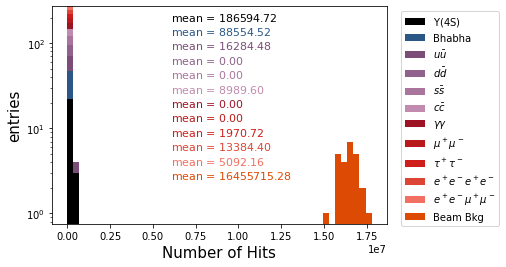

In [106]:
fig, ax = plt.subplots()
#labels = [r'$\Upsilon$(4S)', 'Bhabha', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$', 'Brems HER', 'Brems LER', 'Coulomb HER', 'Coulomb LER', 'Touschek HER', 'Touschek LER']
labels = [r'$\Upsilon$(4S)', 'Bhabha', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$', 'Beam Bkg']
#colors = [(0.0, 0.0, 0.0), (0.165, 0.341, 0.522), (0.486, 0.302, 0.475), (0.561, 0.380, 0.545), (0.663, 0.459, 0.616), (0.753, 0.545, 0.682), (0.612, 0.078, 0.137), (0.725, 0.098, 0.102), (0.808, 0.114, 0.102), (0.863, 0.271, 0.208), (0.949, 0.439, 0.380), (0.482, 0.188, 0.082), (0.659, 0.204, 0.000), (0.863, 0.290, 0.016), (0.957, 0.435, 0.114), (0.996, 0.588, 0.290), (0.973, 0.714, 0.486)]
colors = [(0.0, 0.0, 0.0), (0.165, 0.341, 0.522), (0.486, 0.302, 0.475), (0.561, 0.380, 0.545), (0.663, 0.459, 0.616), (0.753, 0.545, 0.682), (0.612, 0.078, 0.137), (0.725, 0.098, 0.102), (0.808, 0.114, 0.102), (0.863, 0.271, 0.208), (0.949, 0.439, 0.380), (0.863, 0.290, 0.016)]
#bins = []
#for i in range(int(np.amax(hits))+1):
#    bins.append(i - 0.5)
n, axbins, patches = ax.hist([hits[0], hits[1], hits[5], hits[6], hits[7], hits[8], hits[2], hits[3], hits[4], hits[9], hits[10], sumbkghits], bins=50, stacked=True, label=labels, color=colors)

ax.set_xlabel(r'Number of Hits', fontsize=15)
ax.set_ylabel('entries', fontsize=15)
#ax.set_ylim(0, 60)
ax.set_yscale('log')

plt.figtext(.40, .83, r'mean = $%.2f$' % (hits[0].mean()), fontsize=11, color=colors[0])
plt.figtext(.40, .78, r'mean = $%.2f$' % (hits[1].mean()), fontsize=11, color=colors[1])
plt.figtext(.40, .73, r'mean = $%.2f$' % (hits[5].mean()), fontsize=11, color=colors[2])
plt.figtext(.40, .68, r'mean = $%.2f$' % (hits[6].mean()), fontsize=11, color=colors[3])
plt.figtext(.40, .63, r'mean = $%.2f$' % (hits[7].mean()), fontsize=11, color=colors[4])
plt.figtext(.40, .58, r'mean = $%.2f$' % (hits[8].mean()), fontsize=11, color=colors[5])
plt.figtext(.40, .53, r'mean = $%.2f$' % (hits[2].mean()), fontsize=11, color=colors[6])
plt.figtext(.40, .48, r'mean = $%.2f$' % (hits[3].mean()), fontsize=11, color=colors[7])
plt.figtext(.40, .43, r'mean = $%.2f$' % (hits[4].mean()), fontsize=11, color=colors[8])
plt.figtext(.40, .38, r'mean = $%.2f$' % (hits[9].mean()), fontsize=11, color=colors[9])
plt.figtext(.40, .33, r'mean = $%.2f$' % (hits[10].mean()), fontsize=11, color=colors[10])
plt.figtext(.40, .28, r'mean = $%.2f$' % (sumbkghits.mean()), fontsize=11, color=colors[11])
#plt.figtext(.60, .83, r'mean = $%.2f$' % (hits[11].mean()), fontsize=11, color=colors[11])
#plt.figtext(.60, .78, r'mean = $%.2f$' % (hits[12].mean()), fontsize=11, color=colors[12])
#plt.figtext(.60, .73, r'mean = $%.2f$' % (hits[13].mean()), fontsize=11, color=colors[13])
#plt.figtext(.60, .68, r'mean = $%.2f$' % (hits[14].mean()), fontsize=11, color=colors[14])
#plt.figtext(.60, .63, r'mean = $%.2f$' % (hits[15].mean()), fontsize=11, color=colors[15])
#plt.figtext(.60, .58, r'mean = $%.2f$' % (hits[16].mean()), fontsize=11, color=colors[16])


#plt.title('Number of Hits per Physics Event', fontsize=15)

handles, labels = ax.get_legend_handles_labels()
lgnd = ax.legend(handles, labels, bbox_to_anchor=(1.35, 1))
#fig.tight_layout()

plt.savefig('physicshits_deadtime_BG19x1.pdf',bbox_extra_artists=(lgnd,), bbox_inches='tight')

In [107]:
allhits = np.zeros(nfiles, dtype=int)
unwantedhits = np.zeros(nfiles, dtype=int)
for i in range(nfiles):
    for j in range(17):
        allhits[i]+=hits[j][i]
        if j!=0:
            unwantedhits[i] += hits[j][i]


In [108]:
unwantedhits

array([15835676, 16589487, 16478981, 17424174, 16308336, 16101414,
       16988217, 17198247, 16668573, 15127128, 16296823, 15973018,
       17167961, 16646425, 16175382, 16444460, 16567991, 16984748,
       16876245, 17345926, 15873056, 17022588, 16454617, 17972595,
       16227711])

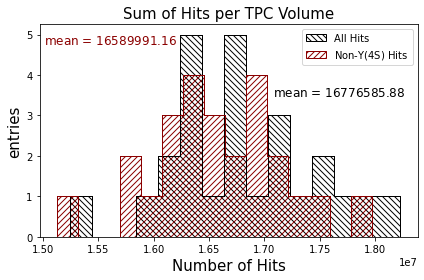

In [109]:
def plt_hist(axis, data, bins, color, hatch, label):
            counts, edges = np.histogram(data, bins=bins)
            edges = np.repeat(edges, 2)
            hist = np.hstack((0, np.repeat(counts, 2), 0))

            outline, = ax.plot(edges, hist, linewidth=1, color=color)
            axis.fill_between(edges, hist, 0,
                              edgecolor=outline.get_color(), hatch=hatch, label=label,
                              facecolor='none')  # < removes facecolor
            axis.set_ylim(0, None, auto=True)
            

fig, ax = plt.subplots()
# labels = [r'$\Upsilon$(4S)', 'Bhabha', r'$u \bar{u}$', r'$d \bar{d}$', r'$s \bar{s}$', r'$c \bar{c}$', r'$\gamma\gamma$', r'$\mu^+ \mu^-$', r'$\tau^+ \tau^-$', r'$e^+e^-e^+e^-$', r'$e^+e^-\mu^+\mu^-$']
# colors = [(0.0, 0.0, 0.0), (0.165, 0.341, 0.522), (0.486, 0.302, 0.475), (0.561, 0.380, 0.545), (0.663, 0.459, 0.616), (0.753, 0.545, 0.682), (0.612, 0.078, 0.137), (0.725, 0.098, 0.102), (0.808, 0.114, 0.102), (0.863, 0.271, 0.208), (0.949, 0.439, 0.380)]
#bins = []
#for i in range(int(np.amax(alltracks))+1):
#    bins.append(i - 0.5)
    
plt_hist(ax, allhits, 15, 'black', r'\ \ \ \ ', 'All Hits')
plt_hist(ax, unwantedhits, 15, 'darkred', '////', r'Non-$\Upsilon$(4S) Hits')
#n, axbins, patches = ax.hist([alltracks, unwantedtracks], bins=bins, )

ax.set_xlabel(r'Number of Hits', fontsize=15)
ax.set_ylabel('entries', fontsize=15)


plt.figtext(.64, .65, r'mean = $%.2f$' % (allhits.mean()), fontsize=12, color='black')
plt.figtext(.11, .83, r'mean = $%.2f$' % (unwantedhits.mean()), fontsize=12, color='darkred')

plt.title('Sum of Hits per TPC Volume', fontsize=15)

plt.legend()
fig.tight_layout()
plt.savefig('sumhits.pdf')

# Density of hits

In [110]:
meanhit = allhits.mean()
meanhit

16776585.88

In [111]:
gain = 2000
flowback = 0.01
K = 203.3 # cm²/(V*s)
E = 300   # V / cm
v = K*E   # cm / s
v = v/10**6  # cm / us
v

0.06099

In [112]:
ion_dist = v * 30
ion_dist

1.8297

In [113]:
ion_number = meanhit * gain * flowback
ion_number

335531717.6

In [114]:
ion_density = ion_number / (ion_dist*np.pi*(109.4**2 - 44.85**2))
ion_density

5862.493847532975

In [6]:
meanhit = 16776585.88
area = np.pi*(109.4**2 - 44.85**2)
area

31280.327542987365

In [41]:
xrange = np.linspace(50, 1050, num=101)

numpix = np.zeros(shape=(101))
hitpix = np.zeros(shape=(101))
for i in range(101):
    numpix[i] = area/(xrange[i]*(10**(-4))*xrange[i]*(10**(-4)))
    if xrange[i]==50:
        print(numpix[i])
    hitpix[i] = meanhit/numpix[i]
numpix

1251213101.7194946


array([1.25121310e+09, 8.68897987e+08, 6.38374031e+08, 4.88755118e+08,
       3.86176883e+08, 3.12803275e+08, 2.58515104e+08, 2.17224497e+08,
       1.85090696e+08, 1.59593508e+08, 1.39023678e+08, 1.22188779e+08,
       1.08236427e+08, 9.65442208e+07, 8.66491068e+07, 7.82008189e+07,
       7.09304479e+07, 6.46287759e+07, 5.91310540e+07, 5.43061242e+07,
       5.00485241e+07, 4.62726739e+07, 4.29085426e+07, 3.98983770e+07,
       3.71942064e+07, 3.47559195e+07, 3.25497685e+07, 3.05471949e+07,
       2.87239004e+07, 2.70591069e+07, 2.55349613e+07, 2.41360552e+07,
       2.28490340e+07, 2.16622767e+07, 2.05656328e+07, 1.95502047e+07,
       1.86081663e+07, 1.77326120e+07, 1.69174297e+07, 1.61571940e+07,
       1.54470753e+07, 1.47827635e+07, 1.41604018e+07, 1.35765311e+07,
       1.30280415e+07, 1.25121310e+07, 1.20262697e+07, 1.15681685e+07,
       1.11357521e+07, 1.07271356e+07, 1.03406041e+07, 9.97459424e+06,
       9.62767853e+06, 9.29855159e+06, 8.98601768e+06, 8.68897987e+06,
      

In [19]:
hitpix 

array([0.01340826, 0.01930789, 0.02628018, 0.03432514, 0.04344275,
       0.05363302, 0.06489596, 0.07723156, 0.09063981, 0.10512073,
       0.12067431, 0.13730054, 0.15499944, 0.173771  , 0.19361522,
       0.2145321 , 0.23652164, 0.25958384, 0.2837187 , 0.30892622,
       0.33520641, 0.36255925, 0.39098475, 0.42048292, 0.45105374,
       0.48269722, 0.51541337, 0.54920218, 0.58406364, 0.61999777,
       0.65700456, 0.695084  , 0.73423611, 0.77446088, 0.81575831,
       0.8581284 , 0.90157115, 0.94608656, 0.99167463, 1.03833536,
       1.08606876, 1.13487481, 1.18475352, 1.2357049 , 1.28772893,
       1.34082562, 1.39499498, 1.450237  , 1.50655167, 1.56393901,
       1.62239901, 1.68193166, 1.74253698, 1.80421496, 1.8669656 ,
       1.9307889 , 1.99568486, 2.06165348, 2.12869476, 2.1968087 ,
       2.2659953 , 2.33625457, 2.40758649, 2.47999107, 2.55346832,
       2.62801822, 2.70364079, 2.78033601, 2.8581039 , 2.93694445,
       3.01685765, 3.09784352, 3.17990205, 3.26303324, 3.34723

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ]),
 <a list of 6 Text major ticklabel objects>)

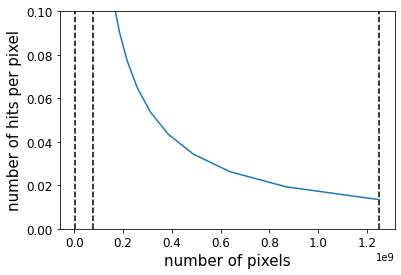

In [40]:
plt.plot(numpix, hitpix)
plt.xlabel("number of pixels", fontsize=15)
plt.ylabel("number of hits per pixel", fontsize=15)
plt.ylim(0,0.1)
plt.vlines(78200818.85746841, 0.0, 0.1, ls='--')
plt.vlines(1251213101.7194946, 0.0, 0.1, ls='--')
plt.vlines(3128032.7542987363, 0.0, 0.1, ls='--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)